In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 16)
warnings.simplefilter("ignore")
os.listdir()

['.ipynb_checkpoints', 'analyse.ipynb', 'whats.csv', 'yt.csv', 'yt_whats.csv']

In [51]:
data = pd.read_csv('yt_whats.csv')


def first_preprocess(data) :
    data.sort_values(by="Time", ascending=True,inplace =True)
    data.reset_index(drop=True, inplace = True)
    data["Time"] = pd.to_datetime(data.Time, unit='ms')
    reserved_values = [5, 65534, 65535]
    data=data[~data.rnti.isin(reserved_values)] # on enlève les plages reservées
    return data

data = first_preprocess(data)
data

,Time,rnti,SFN,format,preamble,ta,nb_TB,MCSi_1,MCSi_2,TBS_1,TBS_2,nb_PRB,connection_id
189,2022-10-14 13:54:39.097,75,1499,2.0,38.0,6.0,1,2,-2,296,-2,7,4
191,2022-10-14 13:54:39.122,75,1524,0.0,38.0,6.0,1,20,-2,408,-2,1,4
193,2022-10-14 13:54:39.130,75,1532,2.0,38.0,6.0,1,2,-2,72,-2,2,4
194,2022-10-14 13:54:39.132,75,1534,2.0,38.0,6.0,1,2,-2,72,-2,2,4
195,2022-10-14 13:54:39.133,75,1535,2.0,38.0,6.0,1,2,-2,32,-2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49130,2022-10-14 14:01:22.100,78,5142,2.0,0.0,5.0,1,28,-2,712,-2,1,6
49133,2022-10-14 14:01:22.122,78,5164,0.0,0.0,5.0,1,9,-2,936,-2,6,6
49136,2022-10-14 14:01:22.161,78,5203,2.0,0.0,5.0,1,28,-2,712,-2,1,6
49884,2022-10-14 14:01:32.132,78,4934,2.0,0.0,5.0,1,28,-2,712,-2,1,6


In [52]:
data[["rnti","connection_id"]].value_counts()


rnti  connection_id
78    6                11313
75    4                 7827
76    5                  232
dtype: int64

In [53]:
# pour yt et whats connec ID 4 

<AxesSubplot:>

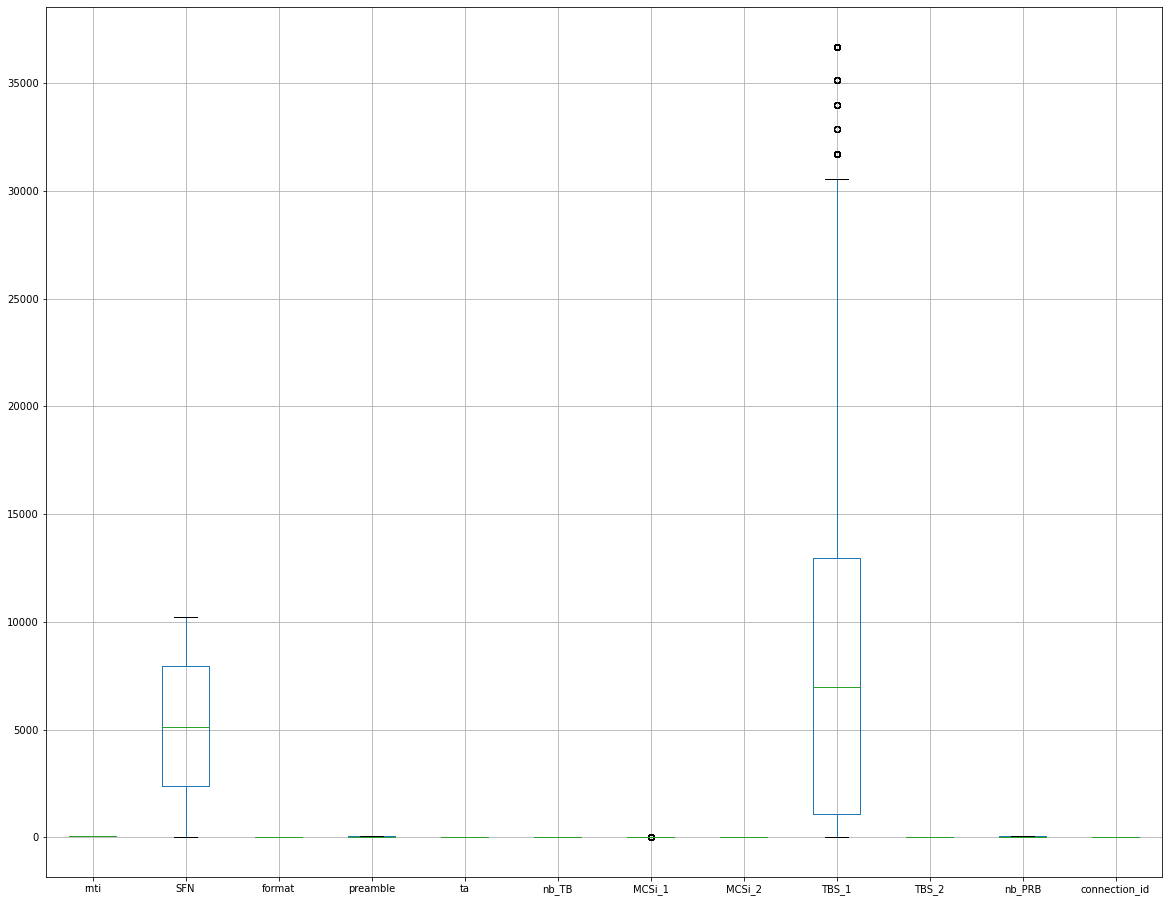

In [54]:
data.boxplot()

In [55]:
to_concat=[]
for value in data.connection_id.unique():
    tmp = data[data.connection_id==value]
    tmp["cum_TBS"] = tmp["TBS_1"].cumsum()
    to_concat.append(tmp)
data = pd.concat(to_concat)
current_data = data[data.connection_id == 4]
current_data

,Time,rnti,SFN,format,preamble,ta,nb_TB,MCSi_1,MCSi_2,TBS_1,TBS_2,nb_PRB,connection_id,cum_TBS
189,2022-10-14 13:54:39.097,75,1499,2.0,38.0,6.0,1,2,-2,296,-2,7,4,296
191,2022-10-14 13:54:39.122,75,1524,0.0,38.0,6.0,1,20,-2,408,-2,1,4,704
193,2022-10-14 13:54:39.130,75,1532,2.0,38.0,6.0,1,2,-2,72,-2,2,4,776
194,2022-10-14 13:54:39.132,75,1534,2.0,38.0,6.0,1,2,-2,72,-2,2,4,848
195,2022-10-14 13:54:39.133,75,1535,2.0,38.0,6.0,1,2,-2,32,-2,1,4,880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16396,2022-10-14 13:56:33.142,75,2904,0.0,38.0,6.0,1,9,-2,936,-2,6,4,136555152
16496,2022-10-14 13:56:34.462,75,4224,0.0,38.0,6.0,1,12,-2,1000,-2,5,4,136556152
16512,2022-10-14 13:56:34.682,75,4444,0.0,38.0,6.0,1,3,-2,872,-2,15,4,136557024
16515,2022-10-14 13:56:34.712,75,4474,2.0,38.0,6.0,1,28,-2,712,-2,1,4,136557736


In [56]:
def plot_data(data,x="Time", y="cum_TBS"):
    data.plot(x=x, y=y)

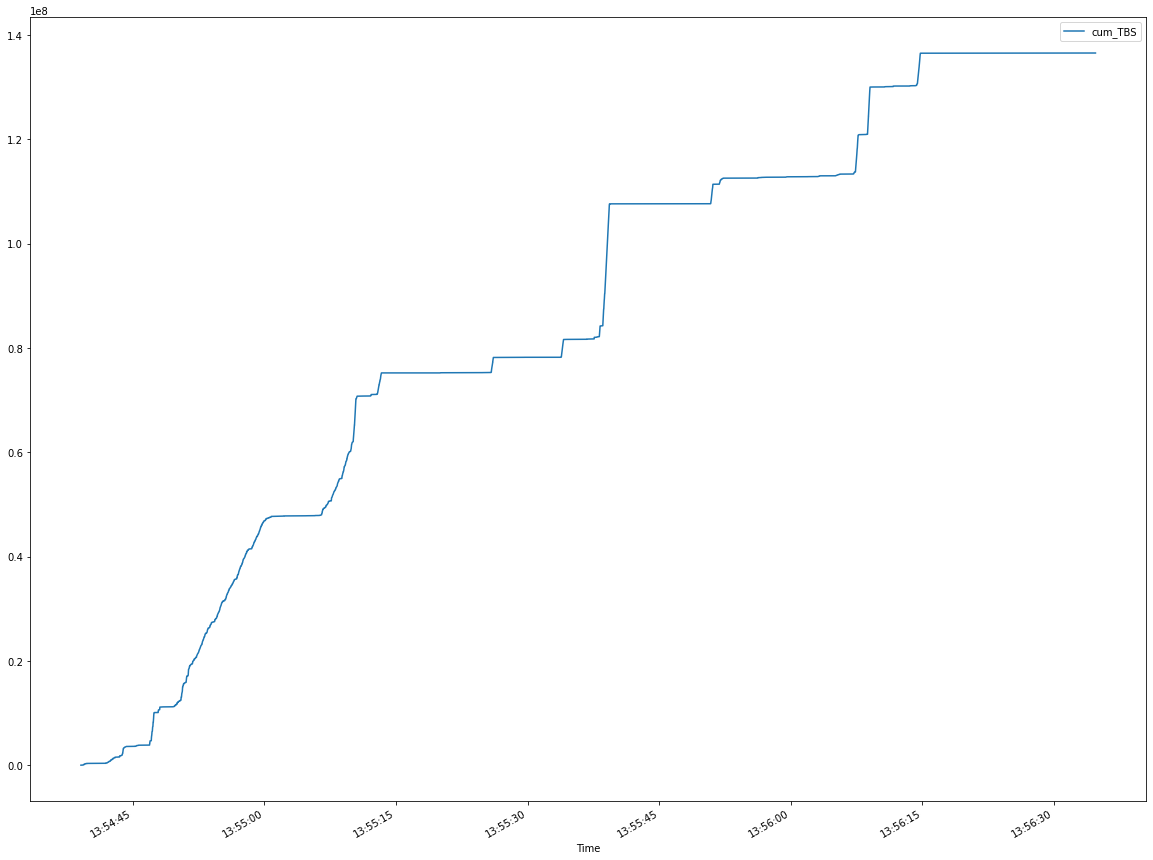

In [57]:
plot_data(current_data)

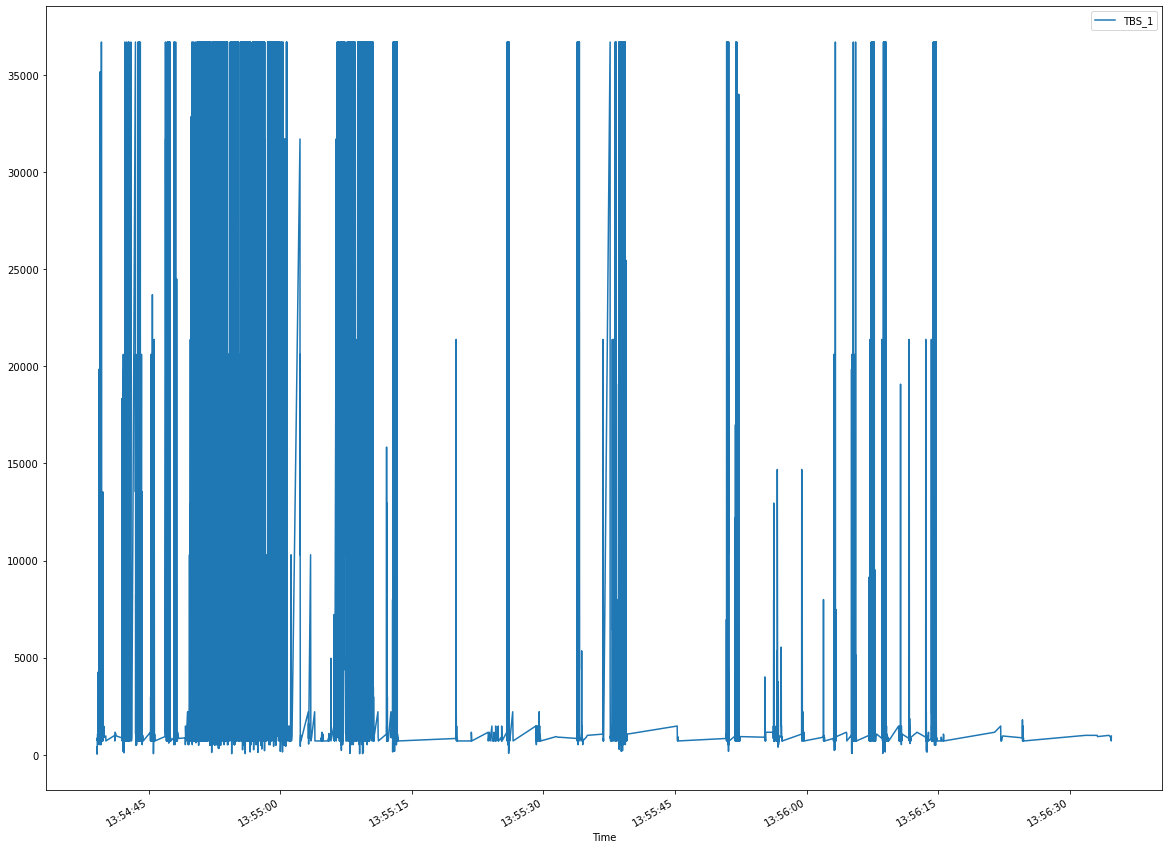

In [58]:
plot_data(current_data,y="TBS_1")

In [59]:
current_data.TBS_1.describe()

count     7827.000000
mean     17447.132235
std      15622.354363
min         32.000000
25%       1160.000000
50%      10296.000000
75%      36696.000000
max      36696.000000
Name: TBS_1, dtype: float64

<AxesSubplot:>

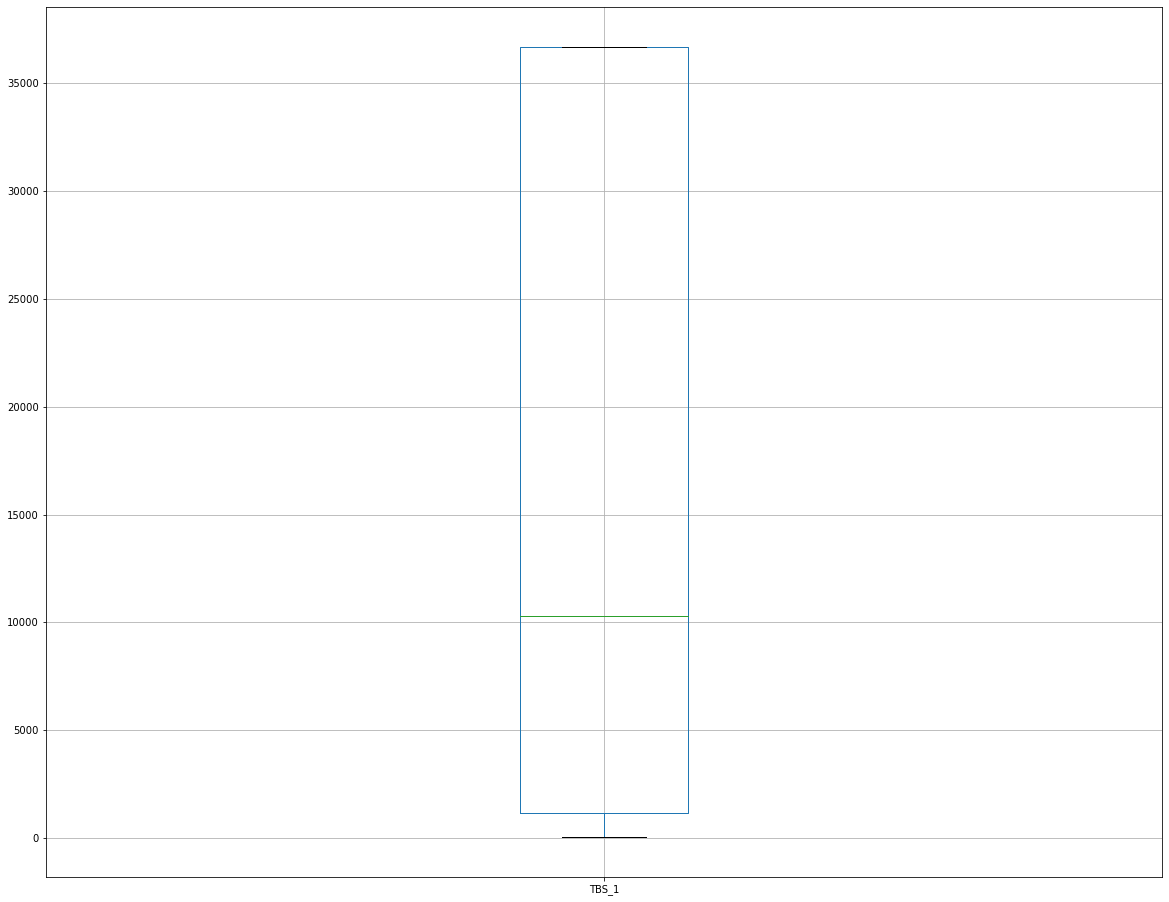

In [60]:
current_data[["TBS_1"]].boxplot()

# Tracé des différents connec_id

In [61]:
to_concat, col_TBS, col_TBS_sum = [], [], []
for value in data.connection_id.unique():
    tmp = data[data.connection_id==value]
    tmp[f"cum_TBS_conn_{value}"] = tmp["TBS_1"].cumsum()
    tmp[f"TBS_1_conn_{value}"] = tmp["TBS_1"]
    col_TBS.append(f"TBS_1_conn_{value}")
    col_TBS_sum.append(f"cum_TBS_conn_{value}")
    to_concat.append(tmp)
extended = pd.concat(to_concat)
extended

,Time,rnti,SFN,format,preamble,ta,nb_TB,MCSi_1,MCSi_2,TBS_1,TBS_2,nb_PRB,connection_id,cum_TBS,cum_TBS_conn_4,TBS_1_conn_4,cum_TBS_conn_5,TBS_1_conn_5,cum_TBS_conn_6,TBS_1_conn_6
189,2022-10-14 13:54:39.097,75,1499,2.0,38.0,6.0,1,2,-2,296,-2,7,4,296,296.0,296.0,NaN,NaN,NaN,NaN
191,2022-10-14 13:54:39.122,75,1524,0.0,38.0,6.0,1,20,-2,408,-2,1,4,704,704.0,408.0,NaN,NaN,NaN,NaN
193,2022-10-14 13:54:39.130,75,1532,2.0,38.0,6.0,1,2,-2,72,-2,2,4,776,776.0,72.0,NaN,NaN,NaN,NaN
194,2022-10-14 13:54:39.132,75,1534,2.0,38.0,6.0,1,2,-2,72,-2,2,4,848,848.0,72.0,NaN,NaN,NaN,NaN
195,2022-10-14 13:54:39.133,75,1535,2.0,38.0,6.0,1,2,-2,32,-2,1,4,880,880.0,32.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49130,2022-10-14 14:01:22.100,78,5142,2.0,0.0,5.0,1,28,-2,712,-2,1,6,71144240,NaN,NaN,NaN,NaN,71144240.0,712.0
49133,2022-10-14 14:01:22.122,78,5164,0.0,0.0,5.0,1,9,-2,936,-2,6,6,71145176,NaN,NaN,NaN,NaN,71145176.0,936.0
49136,2022-10-14 14:01:22.161,78,5203,2.0,0.0,5.0,1,28,-2,712,-2,1,6,71145888,NaN,NaN,NaN,NaN,71145888.0,712.0
49884,2022-10-14 14:01:32.132,78,4934,2.0,0.0,5.0,1,28,-2,712,-2,1,6,71146600,NaN,NaN,NaN,NaN,71146600.0,712.0


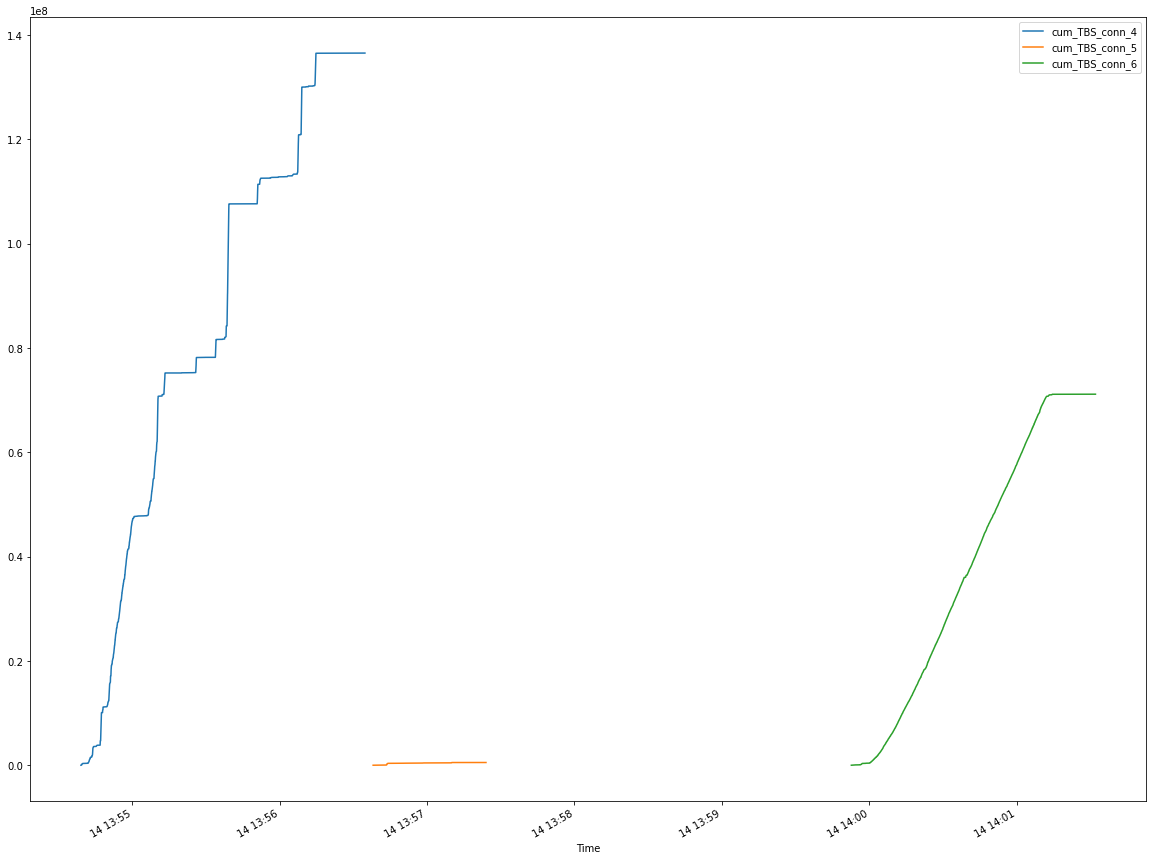

In [62]:
plot_data(extended, y=col_TBS_sum)

In [ ]:
# to apply for each time serie
models = ["reg_lin", "reg_iso", "reg_pol"]


# format data : 
# 2 colonne = 1time series ( valeurs de TBS + son cumsum ), name col = "{label}_{val or sum}_id"
# les lignes = time codes ( on commence à 0 pour toutes)

def pass_trhough_first_layer(data) :
    list_rows = []
    for i in range(len(data.columns)/2) : # Pour chaque time serie
        useful_columns = data.columns[2*i:2*(i+1)]
        new_row = first_layer(data[useful_columns])
        
        new_row["label"] = useful_columns[0].split("_")[0]
        
    
    # concatenate new rows  
    # return concatenation
    
    



def first_layer(data, models):
    
    # apply scaler
    
    metrics = {}
    for model in models : 
        
        metrics = apply_simple_model(model, data, metrics)
    
    return metrics
    
    
    
    
        
    
def apply_simple_model(model, data, metrics) :
    if model =="reg_lin" :
        
        metrics[""]
        
        pass
    
    elif model =="reg_iso" :
        
        
        pass
    
    elif model == "reg_pol" :
        
        pass
    
    else :
        return metrics
    
    
def apply_classifier(metrics_data) :
    
    pass
    
    